In [1]:
import EnsembleKalmanProcesses: TOMLInterface
import EnsembleKalmanProcesses as EKP
using EnsembleKalmanProcesses.ParameterDistributions
import ClimaCalibrate: observation_map, ExperimentConfig
using ClimaAnalysis
import ClimaCalibrate
using Plots
using JLD2
using Statistics
using YAML
using CairoMakie

In [2]:
using Revise
includet("helper_funcs.jl")
includet("observation_map.jl")

┌ Warning: Circular dependency detected. Precompilation will be skipped for:
│   DiffEqBaseChainRulesCoreExt [b00db79b-61e3-50fb-b26f-2d35b2d9e4ed]
│   StaticArrayInterface [0d7ed370-da01-4f52-bd93-41d350b8b718]
│   KernelAbstractions [63c18a36-062a-441e-b654-da1e3ab1ce7c]
│   LinearOperatorsCUDAExt [54ba8605-469e-5680-a54a-585c2e64e6c1]
│   Polyester [f517fe37-dbe3-4b94-8317-1923a5111588]
│   ClimaCore [d414da3d-4745-48bb-8d80-42e94e092884]
│   CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
│   NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c]
│   MathTeXEngine [0a4f8689-d25c-4efe-a92b-7142dfc1aa53]
│   ClimaCoreMakie [908f55d8-4145-4867-9c14-5dad1a479e4d]
│   FiniteDiffSparseArraysExt [699899dd-2948-59d9-a4f6-ce210f3f1f61]
│   RRTMGP [a01a1ee8-cea4-48fc-987c-fc7878d79da1]
│   LayoutPointers [10f19ff3-798f-405d-979b-55457f8fc047]
│   CUDAExt [11b7e2e0-d079-575b-885e-0ab22ef3252c]
│   ClimaUtilitiesClimaCoreInterpolationsExt [0a0a4c67-443a-5cd9-a529-60c88b1c335b]
│   ClimaUtiliti

In [3]:
output_dir = "/scratch/julian/calibrations/exp_7_fix_rsut"
config_i = 1
ylims = (0, 4000)
iteration = nothing
var_names = ("thetaa", "hus", "clw", "arup", "entr", "detr", "waup", 
                "tke", "turbentr", "ta", "rlut", "rsut", "clwvi", "clivi")

reduction = "inst"

config_dict =
    YAML.load_file(joinpath(output_dir, "configs", "experiment_config.yml"))
const z_max = config_dict["z_max"]
const cal_var_names = config_dict["y_var_names"]
const const_noise_by_var = config_dict["const_noise_by_var"]
const n_vert_levels = config_dict["dims_per_var"]
model_config_dict =
    YAML.load_file(joinpath(output_dir, "configs", "model_config.yml"));

In [4]:
ref_paths, months, sites = get_era5_calibration_library()
atmos_config = CA.AtmosConfig(model_config_dict)

# get/store LES obs and norm factors 
zc_model = get_z_grid(atmos_config, z_max = z_max)

# if isnothing(iterations)
#     iterations = get_iters_with_config(config_i, config_dict)
# end

xlims_dict = Dict("arup" => (-0.1, 0.4), "clw" => "auto")

┌ Warning: Failed to convert `config_dict["truncation"] = 40000` to default type String, keeping original value
└ @ ClimaAtmos ~/ClimaAtmos.jl/src/solver/yaml_helper.jl:81
[ Info: Running on CPUSingleThreaded.
[ Info: Setting up single-process ClimaAtmos run
[ Info: Running ClimaCore in unthreaded mode.
┌ Warning: `job_id` is empty and likely not passed to AtmosConfig.
└ @ ClimaAtmos ~/ClimaAtmos.jl/src/solver/types.jl:643
┌ Info: Making AtmosConfig with config files: 
└    /home/jschmitt/ClimaAtmos.jl/src/solver/../../config/default_configs/default_config.yml
┌ Info: Topography
└   topography = "NoWarp"
┌ Warning: perturb_initstate flag is ignored for single column configuration
└ @ ClimaAtmos ~/ClimaAtmos.jl/src/solver/type_getters.jl:200
┌ Warning: Bubble correction not compatible with single column configuration. It will be switched off.
└ @ ClimaAtmos ~/ClimaAtmos.jl/src/solver/type_getters.jl:211
[ Info: Truncating grid to 162 elements below 40000 meters.
┌ Info: Resolution stats

Dict{String, Any} with 2 entries:
  "clw"  => "auto"
  "arup" => (-0.1, 0.4)

In [5]:
function compute_plot_limits(data; margin_ratio = 0.5, fixed_margin = 1.0)

    min_val = minimum(data)
    max_val = maximum(data)

    data_range = max_val - min_val
    margin = data_range == 0 ? fixed_margin : margin_ratio * data_range
    limits = (min_val - margin, max_val + margin)

    return limits
end


compute_plot_limits (generic function with 1 method)

In [6]:
integrated_vars = ["rsut", "rlut", "clwvi", "clivi", "pr"]
t = [[ensemble_data(
    process_profile_variable,
    i, 
    1, 
    config_dict;
    var_name = var_name,
    reduction = reduction,
    output_dir = output_dir,
    z_max = z_max,
    n_vert_levels = n_vert_levels, 
) for i in 1:10] for var_name in integrated_vars];

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
┌ Info: Error during observation map for ensemble member 4
└   err = Simulation failed.
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Com

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT

G_ensemble shape: (1, 50)


[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
[ Info: Computing net shortwave radiation, NOT rsut!
┌ Info: Error during observation map for ensemble member 4
└   err = Simulation failed.
┌ Info: Error during observation map for ensemble member 24
└   err = Simulation failed.


G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)


┌ Info: Error during observation map for ensemble member 4
└   err = Simulation failed.
┌ Info: Error during observation map for ensemble member 24
└   err = Simulation failed.


G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)


┌ Info: Error during observation map for ensemble member 4
└   err = Simulation failed.
┌ Info: Error during observation map for ensemble member 24
└   err = Simulation failed.


G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)


┌ Info: Error during observation map for ensemble member 4
└   err = Simulation failed.
┌ Info: Error during observation map for ensemble member 24
└   err = Simulation failed.


G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)
G_ensemble shape: (1, 50)


In [7]:
eki_filepath = joinpath(
    ClimaCalibrate.path_to_iteration(output_dir, 0),
    "eki_file.jld2",
)
eki = JLD2.load_object(eki_filepath);

In [8]:
dims_per_var = 1
y_truth = get_obs(
    ref_paths[1],
    months[1],
    sites[1],
    integrated_vars;
    normalize = false, 
    z_scm = zc_model,
    log_vars = [""],
)

1
1
1
1
1


5-element Vector{Float32}:
 362.5086
 283.8414
   0.039566804
   0.0015823364
   1.2363494f-5

In [10]:
# hist()
label_dict = Dict(
    "rsut" => "TOA Shortwave (W/m^2)",
    "rlut" => "TOA Longwave (W/m^2)",
    "clwvi" => "Cloud Water Path (kg/m^2)",
    "clivi" => "Cloud Ice Path (kg/m^2)",
    "pr" => "Precipitation (mm/s)",
)

function filtnan(x, i=1)
    x[:, .!isnan.(x[i, :])][:]
end
fig = Figure(size = (1000, 1300))
for (ind, name) in enumerate(integrated_vars)
    ax = Axis(fig[ind, 1], xlabel = "Iteration", ylabel = label_dict[name])
    for i in 1:10
        data = filtnan.(t[ind])[i]
        if name in ["pr"] # flip because era5 is directionally challenged 
            data = -data
        end
        if iszero(data) # violin plot is misleading when all entries are zero
            Makie.scatter!(ax, repeat([i-1], length(data)), data, color = :black)
        elseif i == 1 # add legend
            Makie.violin!(ax, repeat([i-1], length(data)) , data, show_median = true, color = (:blue, 0.5), label = "Ensemble")
        else
            Makie.violin!(ax, repeat([i-1], length(data)) , data, show_median = true, color = (:blue, 0.5))
        end
    end
    Makie.hlines!(ax, [y_truth[ind]], color = :red, label = "ERA5 Observation")
    if ind == 1
        axislegend(ax, position = :rb)
    end
end
# ax = Axis(fig[1, 1], xlabel = "Iteration", ylabel = "Shortwave TOA (W/m^2)")
# for i in 1:10
#     Makie.violin!(ax, repeat([i-1], length(filtnan.(t)[i])) , filtnan.(t)[i], show_median = true)
# end
save(joinpath(output_dir, "plots", "integrated_simulation_violin.png"), fig, px_per_unit = 3)

CairoMakie.Screen{IMAGE}


In [9]:
output_dir

"/scratch/julian/calibrations/exp_7_fix_rsut"

In [14]:
# let's plot column variables
col_vars = ["ta", "hus", "clw"]

ensemble_data(
    process_profile_variable,
    1, 
    1, 
    config_dict;
    var_name = "ta",
    reduction = reduction,
    output_dir = output_dir,
    z_max = 4000,
    n_vert_levels = 62, 
)

G_ensemble shape: (62, 50)
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]


┌ Info: Error during observation map for ensemble member 4
└   err = Simulation failed.


Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.025920

┌ Info: Error during observation map for ensemble member 24
└   err = Simulation failed.



inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]
Processing ta
inst216000.0259200.04000nothingAny[]


┌ Info: Error during observation map for ensemble member 47
└   err = Simulation failed.


62×50 Matrix{Float64}:
 298.437  298.398  298.299  NaN  298.354  …  NaN  298.238  298.278  298.333
 298.159  298.118  298.007  NaN  298.071     NaN  297.936  297.98   298.045
 297.875  297.832  297.714  NaN  297.781     NaN  297.642  297.688  297.752
 297.584  297.539  297.416  NaN  297.483     NaN  297.343  297.39   297.451
 297.288  297.244  297.114  NaN  297.178     NaN  297.041  297.086  297.145
 296.986  296.953  296.819  NaN  296.867  …  NaN  296.742  296.777  296.836
 296.674  296.653  296.524  NaN  296.547     NaN  296.44   296.459  296.524
 296.351  296.338  296.214  NaN  296.218     NaN  296.123  296.132  296.204
 296.019  296.013  295.886  NaN  295.881     NaN  295.794  295.796  295.874
 295.678  295.677  295.549  NaN  295.535     NaN  295.456  295.453  295.533
 295.328  295.331  295.202  NaN  295.18   …  NaN  295.109  295.098  295.182
 294.969  294.971  294.845  NaN  294.818     NaN  294.751  294.735  294.82
 294.599  294.603  294.478  NaN  294.454     NaN  294.383  294.377

In [ ]:
output_dir = "/home/jschmitt/ClimaAtmos.jl/calibration/experiments/reanalysis_forcing/toa_cal/output/prognostic_edmfx_era5driven_column/output_003"
config_i = 1
ylims = (0, 4000)
iteration = nothing
var_names = ("thetaa", "hus", "clw", "arup", "entr", "detr", "waup", 
                "tke", "turbentr", "ta", "rlut", "rsut", "clwvi", "clivi")

reduction = "inst"

config_dict =
    YAML.load_file(joinpath(output_dir, "configs", "experiment_config.yml"))
const z_max = config_dict["z_max"]
const cal_var_names = config_dict["y_var_names"]
const const_noise_by_var = config_dict["const_noise_by_var"]
const n_vert_levels = config_dict["dims_per_var"]
model_config_dict =
    YAML.load_file(joinpath(output_dir, "configs", "model_config.yml"));

In [15]:
# member_path = path_to_ensemble_member(config_dict["output_dir"], 3, 1)
# simdir = SimDir(joinpath(member_path, "config_1", "output_0000"))

process_profile_variable(
    SimDir("output/prognostic_edmfx_era5driven_column/output_active"),
    "rsut";
    reduction = "inst",
    t_start = 1*86400,
    t_end = 1.5*86400,
    z_max = 4000,
    norm_factors_dict= nothing,
    log_vars = [],

)




[ Info: Computing net shortwave radiation, NOT rsut!


293.9226f0

In [10]:

process_rsut(SimDir("output/prognostic_edmfx_era5driven_column/output_0003"), "inst", .4*86400, .5*86400)

301.35687f0

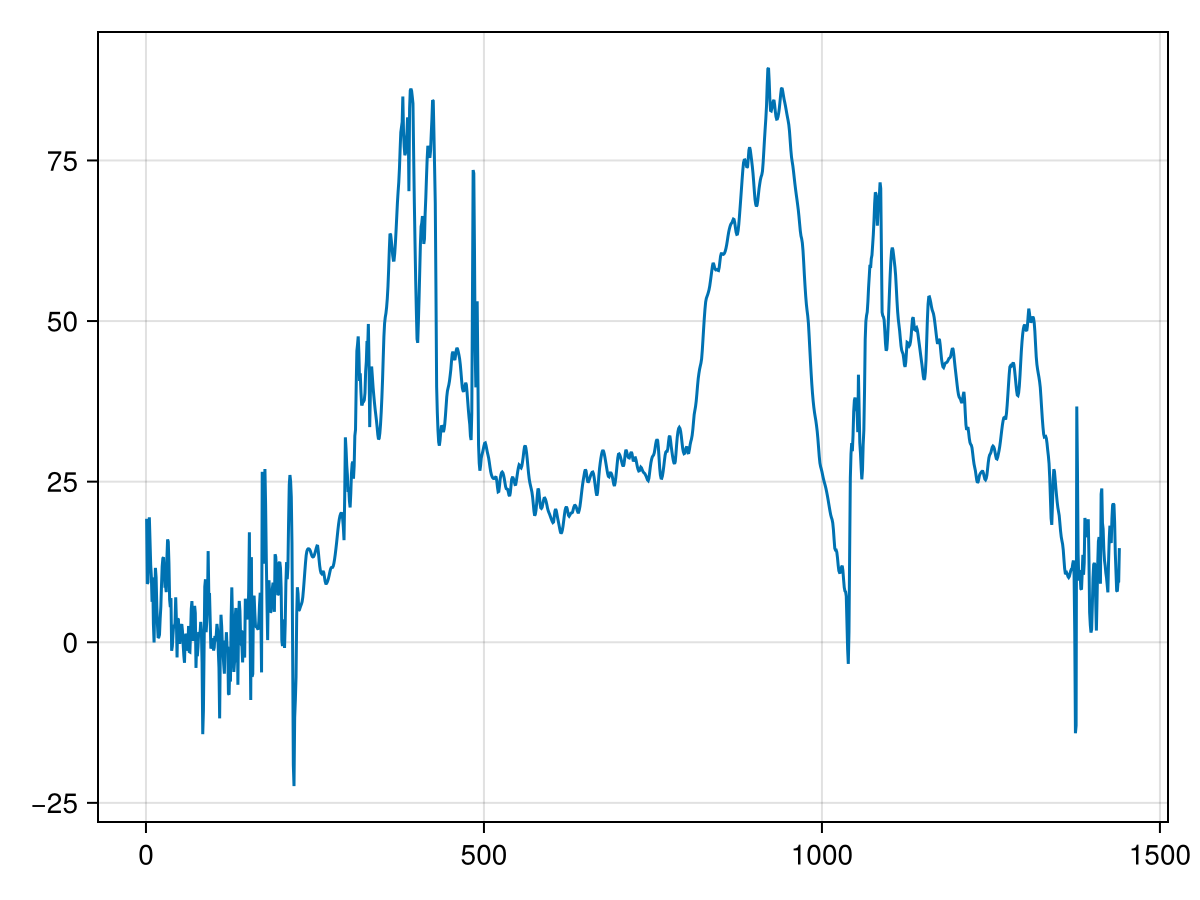

In [27]:
# load cloud radiative effect
using NCDatasets

era5 = NCDataset("/scratch/julian/ERA5/integrated_1.nc")


lon = era5["longitude"][:]
lat = era5["latitude"][:]

# site 23 indexes
lon_idx = argmin(abs.(lon .-211))
lat_idx = argmin(abs.(lat .- 17))

swf = era5["mtnswrf"][:, lat_idx, lon_idx]
swfcs = era5["mtnswrfcs"][:, lat_idx, lon_idx]

lines(swfcs - swf)



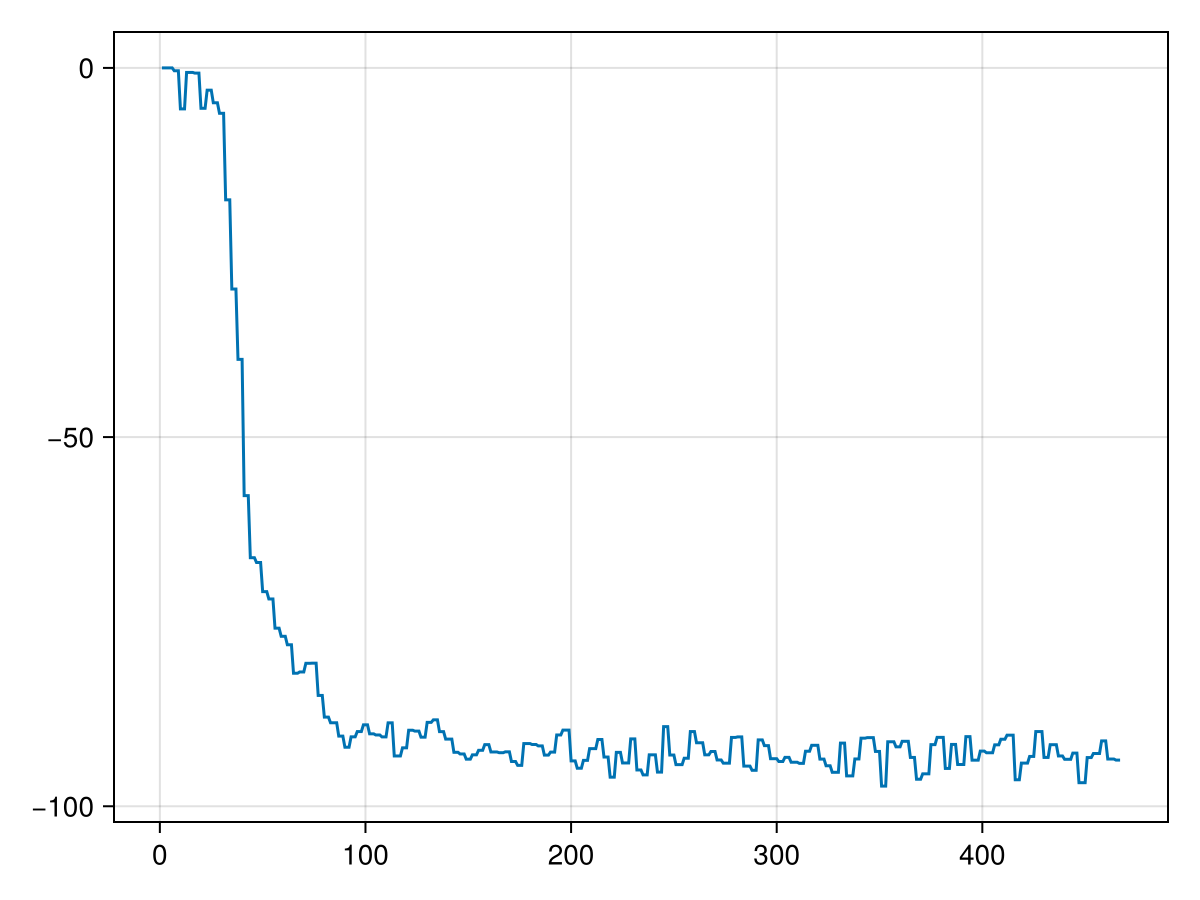

In [33]:
# read from 
simdir = SimDir("/scratch/julian/calibrations/exp_6_month_cov/iteration_010/member_001/config_1/output_0000")

rsutcs = get(simdir, "rsutcs")
rsut = get(simdir, "rsut")

lines(rsutcs.data[:, 1, 1] - rsut.data[:, 1, 1])

In [24]:
using NCDatasets
geo = NCDataset("/scratch/julian/ERA5/geolocation.nc")
site_id = findfirst(geo["site"][:] .== 17)

site_lat = geo["lat"][site_id]
site_lon = geo["lon"][site_id]
println(site_lat, "  ", site_lon)

35.0  235.0


In [ ]:
16, 210
36, 236


CommonDataModel.Attributes{NCDataset{Nothing, Missing}} with 1 entry:
  "__xarray_dataarray_name__" => "lon"